# Week_2
---

### Import Librarys and Set Plot 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from func import *
%matplotlib inline

---
### Search for interested big data information

In [2]:
data = pd.read_csv('../../NTU_大數據與商業分析Datasets/Orders.csv', nrows = 3).T
data

,0,1,2
DateId,20150703,20150703,20150703
MemberId,1388133,1388133,1388133
OrderGroupCode,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...
TrackSourceTypeDef,Web,Web,Web
TrackDeviceTypeDef,Mobile,Mobile,Mobile
PayProfileTypeDef,SevenEleven,SevenEleven,SevenEleven
SalesOrderSlaveId,4457777,4457778,4457779
SalePageId,1242871,1242880,1242880
IsMajor,True,True,True
IsGift,False,False,False


---
### Import interested Values

In [3]:
data = pd.read_csv('../../NTU_大數據與商業分析Datasets/Orders.csv', index_col = False, #low_memory=False,
                   usecols = ['SalesOrderSlaveDateTime', 'SalesOrderSlaveTotalPayment', 'City'])\
                [['SalesOrderSlaveDateTime', 'SalesOrderSlaveTotalPayment', 'City']]
data.columns = ['Date', 'Payment', 'City']
data.head()

,Date,Payment,City
0,2015-07-03 07:30:02.007,350.0,嘉義縣
1,2015-07-03 07:30:02.023,199.0,嘉義縣
2,2015-07-03 07:30:02.040,199.0,嘉義縣
3,2015-07-03 07:30:02.057,225.0,嘉義縣
4,2015-07-03 07:33:01.600,100.0,桃園市


---
### Look for Unwanted Values

In [4]:
data.loc[:,'City'].unique()

array(['嘉義縣', '桃園市', '台南市', '新北市', '新竹市', '台北市', '苗栗縣', '台中市', '高雄市',
       '彰化縣', '屏東縣', '新竹縣', '宜蘭縣', '花蓮縣', '雲林縣', '台東縣', '基隆市', '南投縣',
       '嘉義市', '台東市', '澎湖縣', '屏東市', 'New', '<fo', 'Kao', 'Kot', 'Tao',
       'Hy ', nan, '25 ', 'Keb', '1st', 'Tai', 'Ins', '桃園縣', 'Đại', 'Cha',
       'Xin', 'Quậ', 'Nan', 'No.', 'Hsi', 'Daf', 'Aya', 'Jia'],
      dtype=object)

---
### Remove Unwanted Values (\u4e00 ~ \u9fff : Chinese ASCII)

In [5]:
data = data[('\u4e00' <= data['City'].str[0]) & (data['City'].str[0] <= '\u9fff')]
data.loc[:,'City'].unique()

array(['嘉義縣', '桃園市', '台南市', '新北市', '新竹市', '台北市', '苗栗縣', '台中市', '高雄市',
       '彰化縣', '屏東縣', '新竹縣', '宜蘭縣', '花蓮縣', '雲林縣', '台東縣', '基隆市', '南投縣',
       '嘉義市', '台東市', '澎湖縣', '屏東市', '桃園縣'], dtype=object)

---
### Change City Data

In [6]:
data.loc[:,'City'].replace('桃園縣', '桃園市', inplace = True)
data.loc[:,'City'].replace('台北縣', '新北市', inplace = True)
data.loc[:,'City'].replace('台東市', '台東縣', inplace = True)
data.loc[:,'City'].replace('屏東市', '屏東縣', inplace = True)
data.loc[:,'City'].replace('台南縣', '台南市', inplace = True)
data.loc[:,'City'].unique()

array(['嘉義縣', '桃園市', '台南市', '新北市', '新竹市', '台北市', '苗栗縣', '台中市', '高雄市',
       '彰化縣', '屏東縣', '新竹縣', '宜蘭縣', '花蓮縣', '雲林縣', '台東縣', '基隆市', '南投縣',
       '嘉義市', '澎湖縣'], dtype=object)

---
### Add Date Columns for Web Crawler

In [7]:
data.insert(1, 'Year', pd.DatetimeIndex(data['Date']).year.astype('str'))
data.insert(2, 'Month', pd.DatetimeIndex(data['Date']).month.astype('str'))
data.insert(3, 'Day', pd.DatetimeIndex(data['Date']).day.astype('str'))
data

,Date,Year,Month,Day,Payment,City
0,2015-07-03 07:30:02.007,2015,7,3,350.0,嘉義縣
1,2015-07-03 07:30:02.023,2015,7,3,199.0,嘉義縣
2,2015-07-03 07:30:02.040,2015,7,3,199.0,嘉義縣
3,2015-07-03 07:30:02.057,2015,7,3,225.0,嘉義縣
4,2015-07-03 07:33:01.600,2015,7,3,100.0,桃園市
5,2015-07-03 07:33:01.600,2015,7,3,188.0,桃園市
6,2015-07-03 07:33:01.617,2015,7,3,199.0,桃園市
7,2015-07-03 07:33:01.633,2015,7,3,99.0,桃園市
8,2015-07-03 07:38:35.610,2015,7,3,149.0,台南市
9,2015-07-03 07:38:35.610,2015,7,3,150.0,台南市


---
### Select Wanted City
* 新竹市 has the least stations (only two) but it costs about 20 mins to catch data

In [8]:
Keelung = data[data['City']=='新竹市']
group = Keelung.groupby(['City', 'Year', 'Month', 'Day']).sum()
group

Payment
City Year Month Day         
新竹市  2015 10    1    36264.0
                10   26858.0
                11   44666.0
                12   51533.0
                13   27453.0
                14   33856.0
                15   29302.0
                16   22922.0
                17   31508.0
                18   43021.0
                19   37340.0
                2    29609.0
                20   43331.0
                21   27155.0
                22   23324.0
                23   24727.0
                24   34544.0
                25   44481.0
                26   26570.0
                27   22491.0
                28   19109.0
                29   16209.0
                3    26662.0
                30   17120.0
                31   19694.0
                4    25471.0
                5    25386.0
                6    12457.0
                7    12904.0
                8    17615.0
...                      ...
     2018 3     24   45774.0
                25   29284.0
                26   31793.0
                27   50994.0
                28   28998.0
                29   34139.0
                3    24965.0
                30   33705.0
                31   31504.0
                4    31458.0
                5    28345.0
                6    30194.0
                7    23536.0
                8    21463.0
                9    24675.0
          4     1    34746.0
                10   27389.0
                11   29732.0
                12   36644.0
                13   31099.0
                14   33290.0
                15   46837.0
                2    27357.0
                3    39062.0
                4    39910.0
                5    46335.0
                6    32687.0
                7    38340.0
                8    35294.0
                9    26563.0

[1064 rows x 1 columns]

---
### Import station info for web crawler

In [9]:
station_info = getUrls()
station_info

,Chinese,City,English,Url
0,板橋,新北市,BANQIAO,https://e-service.cwb.gov.tw/HistoryDataQuery/...
1,淡水,新北市,TAMSUI,https://e-service.cwb.gov.tw/HistoryDataQuery/...
2,鞍部,臺北市,ANBU,https://e-service.cwb.gov.tw/HistoryDataQuery/...
3,臺北,臺北市,TAIPEI,https://e-service.cwb.gov.tw/HistoryDataQuery/...
4,竹子湖,臺北市,ZHUZIHU,https://e-service.cwb.gov.tw/HistoryDataQuery/...
5,基隆,基隆市,KEELUNG,https://e-service.cwb.gov.tw/HistoryDataQuery/...
6,彭佳嶼,基隆市,PENGJIAYU,https://e-service.cwb.gov.tw/HistoryDataQuery/...
7,花蓮,花蓮縣,HUALIEN,https://e-service.cwb.gov.tw/HistoryDataQuery/...
8,新屋,桃園市,XINWU,https://e-service.cwb.gov.tw/HistoryDataQuery/...
9,蘇澳,宜蘭縣,SU-AO,https://e-service.cwb.gov.tw/HistoryDataQuery/...


---
### Start web crawler and calcuate time spend

In [10]:
Temperature = []
Precipitation = []

tStart = time.time()
for i in range(len(group)):
    info = group.iloc[i].name
    temp = getClimate(info[0], info[1] + '-' + info[2].zfill(2) + '-' + info[3].zfill(2), station_info)
    Temperature.append(temp[0])
    Precipitation.append(temp[1])
tEnd = time.time()
print('Elapsed time: %d (min) %.1f (sec)' % ((tEnd - tStart)/60, (tEnd - tStart)%60,))

Elapsed time: 19 (min) 38.6 (sec)


In [11]:
Temperature

[27.413858,
 23.693748,
 21.770834,
 22.545834,
 22.5625,
 22.606249,
 23.1375,
 24.145836,
 24.127083,
 23.95625,
 25.710417,
 25.2625,
 26.077084,
 24.729168,
 24.350723,
 24.65625,
 24.820833,
 24.825,
 24.530346,
 24.807737,
 24.828571,
 24.223915,
 26.389584,
 23.933334,
 22.775,
 27.145834,
 27.322918,
 27.245924,
 26.385418,
 25.370832,
 22.545834,
 22.333607,
 21.370834,
 21.37011,
 23.820267,
 23.550596,
 23.514585,
 24.541668,
 24.043749,
 24.702084,
 25.279167,
 24.102081,
 20.608334,
 24.370834,
 22.975998,
 23.639584,
 23.400002,
 22.039585,
 21.135418,
 15.879166,
 15.027082,
 18.154167,
 20.381367,
 23.083334,
 21.295834,
 24.735416,
 25.207895,
 25.167847,
 24.945267,
 24.933786,
 23.89,
 21.66893,
 19.169445,
 18.226269,
 18.807919,
 19.973913,
 20.322323,
 16.501087,
 14.014584,
 11.541857,
 14.900001,
 18.974998,
 21.375,
 18.160416,
 19.521782,
 20.818932,
 20.984325,
 19.75303,
 16.412498,
 16.658524,
 15.752499,
 15.708036,
 17.05655,
 18.0125,
 15.507853,
 16.132

In [12]:
Precipitation

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.020833334,
 0.0,
 0.0,
 0.010416667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34375,
 3.34375,
 0.0,
 0.0,
 0.10416667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.17708334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0704656,
 0.010869565,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34375,
 0.0,
 0.78668475,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.052083336,
 0.5729166,
 0.0,
 0.0,
 0.20928031,
 0.0,
 2.1979165,
 0.0,
 0.0,
 0.0,
 3.8541667,
 0.03125,
 0.78125,
 2.125,
 2.7708335,
 0.16666667,
 0.03125,
 0.0,
 0.6458333,
 0.0,
 0.0,
 0.21875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.15625,
 1.6354167,
 0.020833334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13541666,
 0.0,
 0.0,
 0.0,
 0.125,
 0.0,
 0.0,


---
### Total Payment v.s. Temperature
* 越熱越容易上網買東西
  * 大約在 22 度附近所花費的金額最高
  * 溫度越高越多人購買東西（大概 29 度點最密集）

Text(0,0.5,'Total Payment ($)')

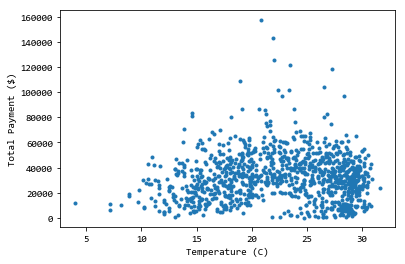

In [13]:
plt.plot(Temperature, group.Payment, '.')
plt.xlabel('Temperature (C)')
plt.ylabel('Total Payment ($)')

### Total Payment v.s. Precipitation
* 沒有下雨時比較多人買東西

Text(0,0.5,'Total Payment ($)')

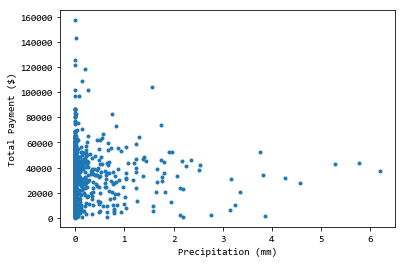

In [14]:
plt.plot(Precipitation, group.Payment, '.')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Total Payment ($)')

###  Precipitation v.s. Temperature
* 新竹的平均溫差滿大的
* 新竹不怎麼下雨

Text(0,0.5,'Precipitation (mm)')

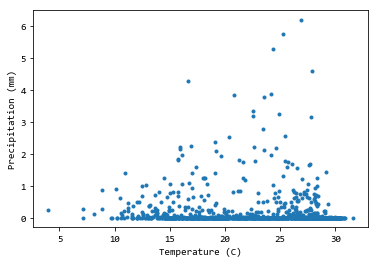

In [15]:
plt.plot(Temperature, Precipitation, '.')
plt.xlabel('Temperature (C)')
plt.ylabel('Precipitation (mm)')